# Data visualization

In [1]:
# Load iris dataset
import sklearn
from sklearn.datasets import load_iris
iris = load_iris()

print(f"data.shape:{iris.data.shape}")
print(f"target.shape:{iris.target.shape}")
print(f"iris.target_names : {iris.target_names}")


data.shape:(150, 4)
target.shape:(150,)
iris.target_names : ['setosa' 'versicolor' 'virginica']


Iris data set in 2d space visualization

The histogeram of each feature shows the distribution of features for each class

<img src="https://github.com/pranaymethuku/classical-ml/raw/master/result-plots/knn_classification.png" width=1000 height=1000 />


# PCA

In [2]:
# import PCA from sklearn
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(iris.data)
X_r =pca.transform(iris.data)
print(f"data.shape after PCA :{X_r.shape}")

data.shape after PCA :(150, 2)


In [3]:
# Principal axes in feature space, representing the directions of maximum variance in the data
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [4]:
# Percentage of variance explained by each of the selected components
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

Text(0.5, 1.0, 'PCA of IRIS dataset with 2 components')

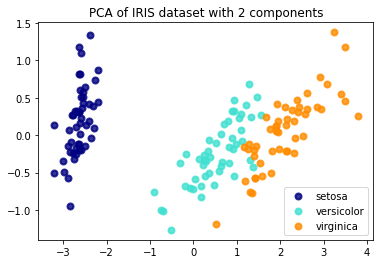

In [5]:
import matplotlib.pyplot as plt

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, iris.target_name in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X_r[iris.target == i, 0], X_r[iris.target == i, 1], color=color, alpha=.8, lw=lw,
                label=iris.target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset with 2 components')

<div style="border: solid 3px #000;">
    <h1 style="text-align: center; color:#000; font-family:Georgia; font-size:26px;">Question</h1>
    <h1 style="text-align: left; color:#000; font-family:Georgia; font-size:18px;"> &emsp; What is the difference of having only one component and having 3 components?</h1>
    <p style='text-align: left;'> </p>
</div>

In [24]:
# Answer


# t-SNE

In [7]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2).fit_transform(iris.data)

X_embedded.shape

(150, 2)

Text(0.5, 1.0, 't-SNE of IRIS dataset with 2 components')

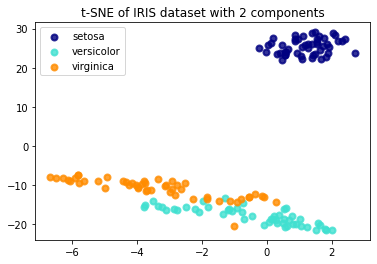

In [8]:
import matplotlib.pyplot as plt

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, iris.target_name in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X_embedded[iris.target == i, 0], X_embedded[iris.target == i, 1], color=color, alpha=.8, lw=lw,
                label=iris.target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('t-SNE of IRIS dataset with 2 components')

<div style="border: solid 3px #000;">
    <h1 style="text-align: center; color:#000; font-family:Georgia; font-size:26px;">Question</h1>
    <h1 style="text-align: left; color:#000; font-family:Georgia; font-size:18px;"> &emsp; Run t-SNE algorithm on IRIS dataset several time and check the visualization. Why is the result different?</h1>
    <p style='text-align: left;'> </p>
</div>

<div style="border: solid 3px #000;">
    <h1 style="text-align: center; color:#000; font-family:Georgia; font-size:26px;">Exercise</h1>
    <p style='text-align: left;'> </p>
</div>

1. Go to the projector website: https://projector.tensorflow.org/

2. Select Mnist dataset (which is image of hand writting digits More info in http://yann.lecun.com/exdb/mnist/ )

3. Select PCA and set Color by, label by to "label".

4. By activating checkbox of 3rd component in left below find the different of variance coverage in the case of using 2 components and 3 components?

5. Select t-SNE mode see the process.




In [9]:
# load and save wine data set from sklearn in your local system

from sklearn.datasets import load_wine
wine = load_wine()

print(f"wine.shape:{wine.data.shape}")
print(f"wine.shape:{wine.target.shape}")
print(f"wine.target_names : {wine.target_names}")

wine.shape:(178, 13)
wine.shape:(178,)
wine.target_names : ['class_0' 'class_1' 'class_2']


In [10]:
# save wine data set in tsv format
# one file for data features and one file for target label

import csv
with open('wine_data.tsv', 'w') as tsvfile:
    writer = csv.writer(tsvfile, delimiter='\t')
    for s in range(len(wine.data)):
        record=[]
        for feature in wine.data[s]:
            record.append(feature)
        writer.writerow(record)
        
with open('wine_target.tsv', 'w') as tsvfile:
    writer = csv.writer(tsvfile, delimiter='\t')
    for s in range(len(wine.data)):
        record=[]
        record.append(wine.target[s])
        writer.writerow(record)

5. Load the saved file in projector.tensorflow : In Step 1 (Load a TSV file of vectors) select wine_data.tsv ans in Step 2 (Load a TSV file of metadata) select wine_target.tsv


# Clustering

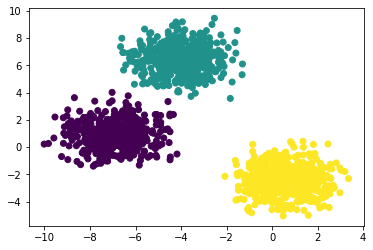

In [11]:
# creat a toy dataset with 1500 samples and 3 classes
from sklearn.datasets import make_blobs

n_samples = 1500
random_state = 1760
toy_X, toy_y = make_blobs(n_samples=n_samples, random_state=random_state)


import matplotlib.pyplot as plt
plt.scatter(toy_X[:, 0], toy_X[:, 1],c=toy_y)
plt.show()

**In Scikit Learnm there are two functions that will be use for train and/or predict:**

**fit(inputs)** : Fit (train) the model from features

**fit_predict(inputs)** : Fit (train) and return the result of each sample.

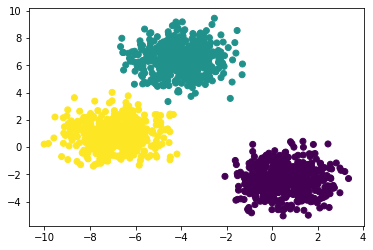

In [12]:
# modeling data with K-Means 

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit_predict(toy_X)
toy_y_pred = kmeans.predict(toy_X)

plt.scatter(toy_X[:, 0], toy_X[:, 1],c=toy_y_pred)
plt.show()

In [13]:
# Since we know the real class the clustering performance can be calculated according to accuracy
from sklearn.metrics import accuracy_score
print("Accuracy of K-Means with 3 clusters:",accuracy_score(toy_y, toy_y_pred))


Accuracy of K-Means with 3 clusters: 0.3333333333333333


<div style="border: solid 3px #000;">
    <h1 style="text-align: center; color:#000; font-family:Georgia; font-size:26px;">Question</h1>
    <h1 style="text-align: left; color:#000; font-family:Georgia; font-size:18px;"> &emsp; Why is the accuracy of clustering only 33%?</h1>
    <p style='text-align: left;'> </p>
</div>

In [14]:
# Use pair_confusion_matrix for clustering evaluation
from sklearn.metrics.cluster import pair_confusion_matrix

# Example:
cluster_label_real= [0,0,0,1,1,1,2,2,2]
cluster_label_real= [1,1,1,0,0,0,2,2,2]
print("Accuracy :",accuracy_score(toy_y, toy_y_pred))

pair_confusion_matrix(cluster_label_real, cluster_label_real)
# C[0,0] : number of pairs with both clusterings having the samples not clustered together
# C[0,1]  : number of pairs with the true label clustering having the samples clustered together but the other clustering not having the samples clustered together
# C[1,0]  : number of pairs with the true label clustering not having the samples clustered together but the other clustering having the samples clustered together
# C[1,1]  : number of pairs with both clusterings having the samples clustered together

Accuracy : 0.3333333333333333


array([[54,  0],
       [ 0, 18]])

<div style="border: solid 3px #000;">
    <h1 style="text-align: center; color:#000; font-family:Georgia; font-size:26px;">Exercise</h1>
    <h1 style="text-align: left; color:#000; font-family:Georgia; font-size:18px;"> &emsp; Write a function and calculate the real accuracy of above K-Means clustering</h1>
    <p style='text-align: left;'> </p>
</div>

In [25]:
# Solution

from sklearn.metrics.cluster import pair_confusion_matrix



In [16]:
# Calculate the Silhouette score (lower values indicating better clustering) and Davies Bouldin score (The best value is 1 and the worst value is -1)

from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

print("Silhouette score of K-Means with 3 cluster:",silhouette_score(toy_X, toy_y_pred))
print("Davies Bouldin score of K-Means with 3 cluster:",davies_bouldin_score(toy_X, toy_y_pred))


Silhouette score of K-Means with 3 cluster: 0.7316031086775127
Davies Bouldin score of K-Means with 3 cluster: 0.37421737708988195


<div style="border: solid 3px #000;">
    <h1 style="text-align: center; color:#000; font-family:Georgia; font-size:26px;">Exercise</h1>
    <h1 style="text-align: left; color:#000; font-family:Georgia; font-size:18px;"> &emsp; 1. Calculate Silhouette and Davies Bouldin score for K-Means clustering with 2, 4 clusters? </h1>
    <h1 style="text-align: left; color:#000; font-family:Georgia; font-size:18px;"> &emsp; 2. According to these evaluation metrics, what is the best cluster number (between 2 and 4)?</h1>
    <p style='text-align: left;'> </p>
</div>

In [26]:
# Solution



<div style="border: solid 3px #000;">
    <h1 style="text-align: center; color:#000; font-family:Georgia; font-size:26px;">Exercise</h1>
    <h1 style="text-align: left; color:#000; font-family:Georgia; font-size:18px;"> &emsp; 1. Creat a Agglomerative Clustering model   </h1>
    <h1 style="text-align: left; color:#000; font-family:Georgia; font-size:18px;"> &emsp; 2. Calculate the accuracy and number of clusters of model with different distance_threshold = [1,10,100,200,400] </h1>
    <p style='text-align: left;'> </p>
</div>

In [27]:
from sklearn.cluster import AgglomerativeClustering

# Number of clusters can be found with len(set(toy_y_pred))

# hac_clustering = AgglomerativeClustering(n_clusters=None,distance_threshold={thr})


# Solution



<div style="border: solid 3px #000;">
    <h1 style="text-align: center; color:#000; font-family:Georgia; font-size:26px;">Exercise Wine Quality</h1>
    <p style='text-align: left;'> </p>
</div>

About Wine Quality Dataset:
    
Input variables (based on physicochemical tests):

1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol

Output variable (based on sensory data):

12. quality (score between 0 and 10)


More information on this [link](https://archive.ics.uci.edu/ml/datasets/wine+quality) and this [reference](https://www.sciencedirect.com/science/article/pii/S0167923609001377?via%3Dihub)

In [19]:
# Load data set:

import numpy as np
import csv

with open("winequality-red.csv") as f_input:
    csvreader = csv.reader(f_input,delimiter=';')
    header = next(csvreader)
    winequality_data=np.array([list(map(float, row)) for row in csvreader])

winequality_x=winequality_data[:,:11]
winequality_y=winequality_data[:,11]
print(f"winequality_x.shape:{winequality_x.shape}")
print(f"winequality_y.shape:{winequality_y.shape}")

winequality_x.shape:(1599, 11)
winequality_y.shape:(1599,)


<div style="border: solid 3px #000;">
    <h1 style="text-align: left; color:#000; font-family:Georgia; font-size:18px;"> &emsp; 1. Divide randomly data into train (80%) and test (20%) </h1>
    <h1 style="text-align: left; color:#000; font-family:Georgia; font-size:18px;"> &emsp; 2. Creat a Gaussian Naive Bayes,an SVM, and a Random Forest Classification model and compare their classification accuracy</h1>
    <h1 style="text-align: left; color:#000; font-family:Georgia; font-size:18px;"> &emsp; 3. Find the best option for max_depth (the maximum depth of the tree) in Random Forest (try 1,2,3,4,5)</h1>
    <h1 style="text-align: left; color:#000; font-family:Georgia; font-size:18px;"> &emsp; 4. Since the target value (quality score) is numerical, the problem can be model with as regression. Creat a RandomForestRegressor model and calculate the RMSE of predicted values with max_depth=5</h1>
    <h1 style="text-align: left; color:#000; font-family:Georgia; font-size:18px;"> &emsp; 5. Round the output of regressor model and evaluate the accuracy of values as classification label</h1>
    <p style='text-align: left;'> </p>
</div>

In [ ]:
# Grid Search
#The parameters of the model are optimized by cross-validated grid-search over a parameter grid

from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor

param_grid = {'max_depth':[1,2,3,4,5]} # a dictionary of all variables ans correspond values as list that supposed to be optimized

rfr = RandomForestRegressor(random_state=0) # this model called estimator
gs = GridSearchCV(estimator=rfr, param_grid=param_grid)
gs.fit(winequality_x,winequality_y) # train and scoring with all data

print("Information about training, prediction, and scoring times:")
print("gs.cv_results_.['mean_fit_time']:",gs.cv_results_['mean_fit_time'])
print("gs.cv_results_.['std_fit_time']:",gs.cv_results_['std_fit_time'])
print("gs.cv_results_.['std_score_time']:",gs.cv_results_['std_score_time'])

print("\nInformation about score of each hyperparameter:")
print("gs.cv_results_.['mean_test_score']:",gs.cv_results_['mean_test_score'])
print("gs.cv_results_.['std_test_score']:",gs.cv_results_['std_test_score'])

print("\nRanking of the best hyperparameter:")
print("gs.cv_results_.['rank_test_score']:",gs.cv_results_['rank_test_score'])

<div style="border: solid 3px #000;">
    <h1 style="text-align: center; color:#000; font-family:Georgia; font-size:26px;">Answer</h1>
    <p style='text-align: left;'> </p>
</div>

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

#Solution


